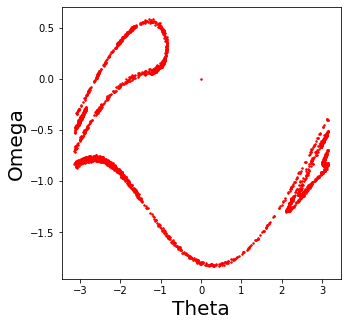

In [2]:
import numpy as np
import pylab as pl

g=9.8
xl=9.8
q = 0.5
F=1.2
W=2.0/3.0
dt=0.04
theta=0.0
omiga=0.
n = 500000
twopi = np.arctan(1.0)*8.0
ThetaT0 = []
OmigaT0 = []
Time0 = []
t = 0.0

for i in range(n):
    xk1=-(g/xl)*np.sin(theta)-q*omiga+F*np.sin(W*t)
    xl1=omiga
    xk2=-(g/xl)*np.sin(theta+dt/2.*xl1)-q*(omiga+dt/2.*xk1)+F*np.sin(W*(t+dt/2))
    xl2=omiga+dt/2.*xk1
    xk3=-(g/xl)*np.sin(theta+dt/2.*xl2)-q*(omiga+dt/2.*xk2)+F*np.sin(W*(t+dt/2))
    xl3=omiga+dt/2.*xk2
    xk4=-(g/xl)*np.sin(theta+dt*xl3)-q*(omiga+dt*xk3)+F*np.sin(W*(t+dt))
    xl4=omiga+dt*xk3

    omiga=omiga+dt/6.*(xk1+2*xk2+2*xk3+xk4)
    theta=theta+dt/6.*(xl1+2*xl2+2*xl3+xl4)

    if(theta > 3.1415927):
        theta=theta-3.1415927*2.
    if(theta < -3.1415927):
        theta=theta+3.1415927*2.

    t=t+dt
    if abs(W*t/twopi-int(W*t/twopi+1.0e-6))<0.005:

       ThetaT0.append(theta)
       OmigaT0.append(omiga)
       Time0.append(t)
    
fig = pl.figure(figsize=(5,5))
pl.plot(ThetaT0, OmigaT0, 'r.', label='theta0=0.0',ms=3.0,linewidth=0.5)
pl.ylabel(r'Omega', fontsize=20)
pl.xlabel(r'Theta', fontsize=20)
pl.show()